# **Group1 BI Project 2**

# 1 - **Data and Packages Import**
## 1.1 - Packages Import

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 1.2- Data Import

In [ ]:
bs = pd.read_csv(r'bs140513_032310.csv')

In [ ]:
bs.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


## 2 - Data Cleaning

For the analysis we'll consider the **bs DataFrame**, it contains more informations about transactions.

## 2.1 - Let's remove single quote in data

In [ ]:
#list of columns where data are between single quote
bs_simple_quote = ["customer", "category", "age", "gender", "zipcodeOri",
                   "merchant", "zipMerchant"]

# Removing quotes
for col in bs_simple_quote:
  bs[col] = bs[col].apply(lambda x: x.replace("'", ""))

bs.head(2)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0


## 2.1 - Values Formatting

In [ ]:
bs['category'].unique()

array(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],
      dtype=object)

In [ ]:
# Rename step
bs.rename(columns={"step": "day"}, inplace=True)

# Rename values of category
bs["category"] = bs.category.map({"es_transportation": "Transportation",
                  "es_health": "Health",
                 "es_wellnessandbeauty": "Wellness and Beauty",
                 "es_travel": "Travel",
                 "es_hotelservices": "Hotel and Services",
                 "es_leisure": "Leisure",
                 "es_home": "Home",
                 "es_hyper": "Hyper",
                 "es_otherservices": "Other Services",
                 "es_tech": "Technology",
                 "es_barsandrestaurants": "Bar and Restaurant",
                 "es_fashion": "Fashion",
                 "es_food":"Food",
                 "es_sportsandtoys":"Sport and Toys",
                 "es_contents":"Contents"})

# Rename values of category
bs["gender"] = bs.gender.map({"M": "Male",
                  "F": "Female", "E": "Entreprise", "U": "Unknown"})

In [ ]:
list(bs["age"].unique())

['4', '2', '3', '5', '1', '6', 'U', '0']

In [ ]:
# We will create a fonction to show the category of ages
def ageToInterv(x):
  """
  Take the value and return the category
  """
  y = ""
  if x == "0":
    y = "0 - 18 ans"
  elif x == "1":
    y = "19 - 25 ans"
  elif x == "2":
    y = "26 - 35 ans"
  elif x == "3":
    y = "36 - 45 ans"
  elif x == "4":
    y = "46 - 5 ans"
  elif x == "5":
    y = "56 - 65 ans"
  elif x == "6":
    y = "Plus de 65 ans"
  elif x == "U":
    y = "Unknown"
  else:
    pass
  return y

In [ ]:
bs["age"] = bs.age.apply(lambda x: ageToInterv(x))

In [ ]:
bs.category.unique()

array(['Transportation', 'Health', 'Other Services', 'Food',
       'Hotel and Services', 'Bar and Restaurant', 'Technology',
       'Sport and Toys', 'Wellness and Beauty', 'Hyper', 'Fashion',
       'Home', 'Contents', 'Travel', 'Leisure'], dtype=object)

In [ ]:
bs.age.unique()

array(['46 - 5 ans', '26 - 35 ans', '36 - 45 ans', '56 - 65 ans',
       '19 - 25 ans', 'Plus de 65 ans', 'Unknown', '0 - 18 ans'],
      dtype=object)

## 2.3 - Null and Duplicated values check

In [ ]:
bs.isna().sum()

day            0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [ ]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   day          594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


We realize the type of is not int or age

In [ ]:
bs.describe()

,day,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


**Important**:
    - 1,2108 % of transactions are fraud
    - 37.89 $ by day

In [ ]:
# check full row duplicated 
bs.duplicated().sum()

0

In [ ]:
bs.nunique()

day              180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

**Informations***
  - The data are collected on 180 days,
  - there are 4 112 customers concerned,
  - 50 merchant,
  - 15 categories of transaction based on purchases




## 2.4 - Final Data

In [ ]:
bsf = bs[bs["fraud"] == 1]
bsnf = bs[bs["fraud"] == 0]

#We finally have 3 dataset: one with the whole data, one with fraudulent transactions "bsf",
# and the last wih clean transactions

## 2.5 - Dummies generated

In [ ]:
ageD = pd.get_dummies(bs.age)


In [ ]:
customerD = pd.get_dummies(bs.customer)


In [ ]:
genderD = pd.get_dummies(bs.gender)


In [ ]:
merchantD = pd.get_dummies(bs.merchant)


In [ ]:
categoryD = pd.get_dummies(bs.category)

In [ ]:
liste_D = [ageD, customerD, genderD, merchantD, categoryD]




# 3 - Data Visualization and Exploratory

In [ ]:
#bg theme used
plt.style.use("seaborn-colorblind")

In [ ]:
cat = bs['category'].value_counts(normalize=True)*100
cat

Transportation         84.944917
Food                    4.415086
Health                  2.713056
Wellness and Beauty     2.536984
Fashion                 1.085357
Bar and Restaurant      1.071735
Hyper                   1.025489
Sport and Toys          0.673009
Technology              0.398558
Home                    0.333982
Hotel and Services      0.293285
Other Services          0.153369
Contents                0.148829
Travel                  0.122426
Leisure                 0.083916
Name: category, dtype: float64

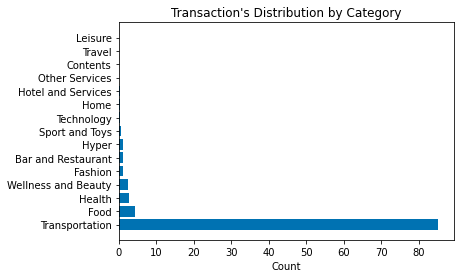

In [ ]:
plt.barh(cat.index, cat)
plt.title("Transaction's Distribution by Category")
plt.xlabel("Count")
plt.show()

In [ ]:
# To generate Barchart
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


In [ ]:
# Probability function
def prob_category(data,top_n,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=()):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

## 3.1 Transactions
We'll analyse the trend of the daily transactions

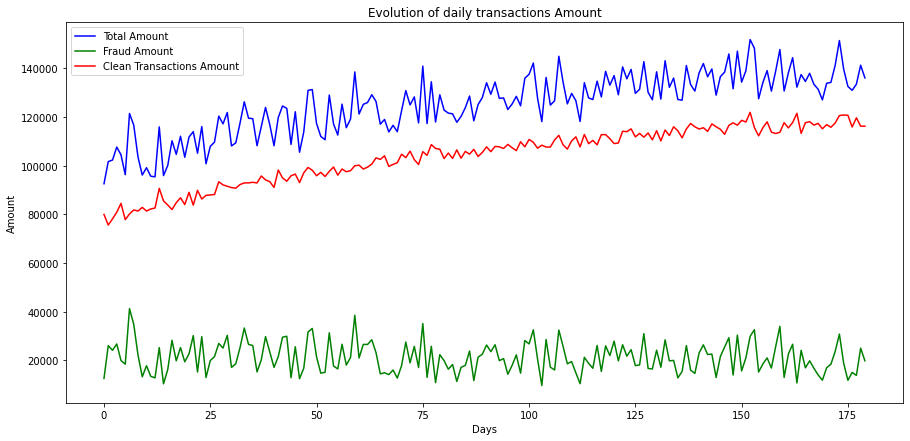

In [ ]:
fig = plt.figure(figsize=(15,7))

amount_plt = pd.pivot_table(data = bs, values = "amount", index="day", aggfunc = "sum")
amount_pltf = pd.pivot_table(data = bsf, values = "amount", index="day", aggfunc = "sum")
amount_pltnf = pd.pivot_table(data = bsnf, values = "amount", index="day", aggfunc = "sum")

plt.plot(amount_plt, label="Total Amount", color="blue")
plt.plot(amount_pltf, label="Fraud Amount", color="green")
plt.plot(amount_pltnf, label = "Clean Transactions Amount", color="red")
plt.title("Evolution of daily transactions Amount")
plt.xlabel("Days")
plt.ylabel("Amount")
plt.legend()
plt.show()

The trend of the amount of fraudulent transaction by day is stable.
The trend of the total amount of transaction is growing.

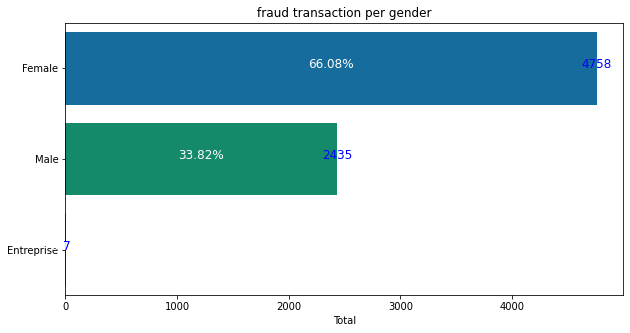

,Total,Percent
Female,4758,0.660833
Male,2435,0.338194
Entreprise,7,0.000972


In [ ]:
prob_category(data=bsf,top_n =5 ,col="gender",abs_value ="Total",rel_value ="Percent",show_plot=True, title="fraud transaction per gender",figsize=(10,5))

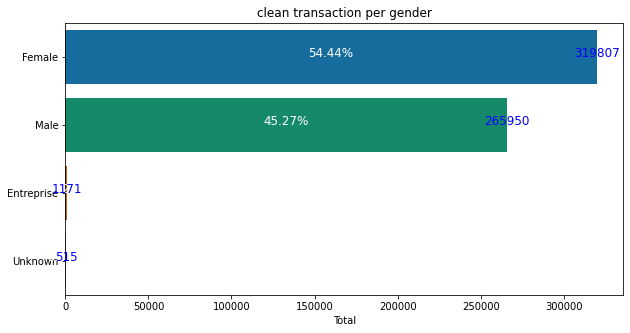

,Total,Percent
Female,319807,0.544405
Male,265950,0.452725
Entreprise,1171,0.001993
Unknown,515,0.000877


In [ ]:
prob_category(data=bsnf,top_n =5 ,col="gender",abs_value ="Total",rel_value ="Percent",show_plot=True, title="clean transaction per gender",figsize=(10,5))

In [ ]:
bs[["amount","fraud"]].groupby("fraud").mean()

,amount
fraud,
0,31.847230
1,530.926551


In [ ]:
bs[["amount","fraud"]].groupby("fraud").std()

,amount
fraud,
0,31.470876
1,835.587112


Let's calculate the % of fraud by category

In [ ]:
x = bsf[["category"]].value_counts()
y = bsnf[["category"]].value_counts()

u = pd.concat([x,y], axis=1,)
u.fillna(0, inplace=True)
u["tot"] = u.sum(axis=1)

u

,0,1,tot
category,,,
Bar and Restaurant,120.0,6253,6373.0
Contents,0.0,885,885.0
Fashion,116.0,6338,6454.0
Food,0.0,26254,26254.0
Health,1696.0,14437,16133.0
Home,302.0,1684,1986.0
Hotel and Services,548.0,1196,1744.0
Hyper,280.0,5818,6098.0
Leisure,474.0,25,499.0


In [ ]:
pivot = bs.pivot_table(index =['category'],
                       values =['fraud'],
                       aggfunc ='mean',)
pivot.sort_values(by="fraud", ascending=False,)*100

,fraud
category,
Leisure,94.989980
Travel,79.395604
Sport and Toys,49.525237
Hotel and Services,31.422018
Other Services,25.000000
Home,15.206445
Health,10.512614
Technology,6.666667
Wellness and Beauty,4.759380


Contents, Food and Transportation don't have fraudulent transactions
At same time, Leisure, Travel are category


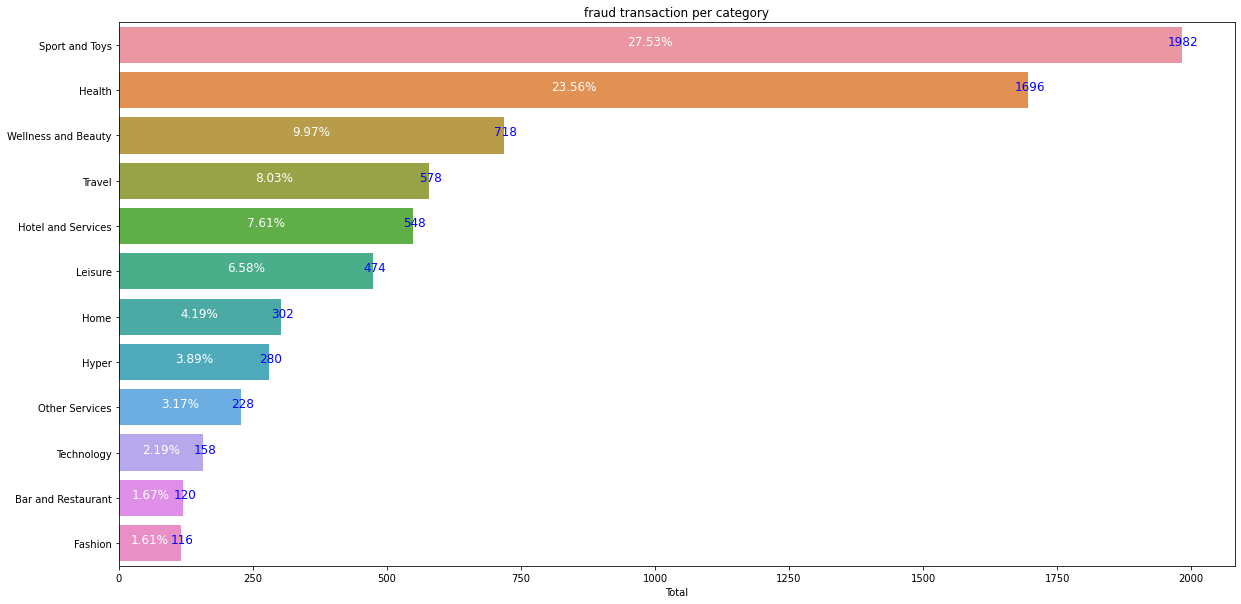

,Total,Percent
Sport and Toys,1982,0.275278
Health,1696,0.235556
Wellness and Beauty,718,0.099722
Travel,578,0.080278
Hotel and Services,548,0.076111
Leisure,474,0.065833
Home,302,0.041944
Hyper,280,0.038889
Other Services,228,0.031667
Technology,158,0.021944


In [ ]:
prob_category(data=bsf,top_n =15 ,col="category",abs_value ="Total",rel_value ="Percent",show_plot=True, title="fraud transaction per category",figsize=(20,10))

In [ ]:
t2 = bsf["category"].value_counts(normalize=True, ascending=False)*100
t2.head()
#plt.barh(t2.index, t2)
#plt.xlabel("% in fraudulent transactions")
#plt.title("Distribution of Categories in fraudulent transactions")
#plt.show()

Sport and Toys         27.527778
Health                 23.555556
Wellness and Beauty     9.972222
Travel                  8.027778
Hotel and Services      7.611111
Name: category, dtype: float64

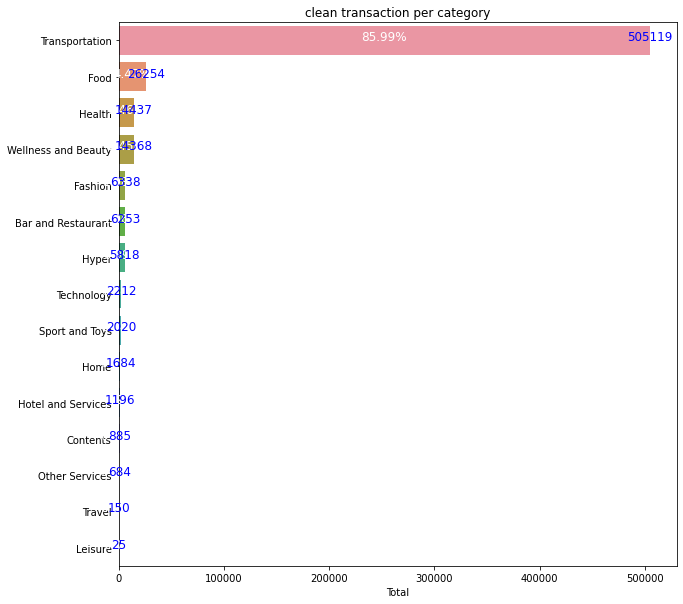

,Total,Percent
Transportation,505119,0.859860
Food,26254,0.044692
Health,14437,0.024576
Wellness and Beauty,14368,0.024459
Fashion,6338,0.010789
Bar and Restaurant,6253,0.010644
Hyper,5818,0.009904
Technology,2212,0.003765
Sport and Toys,2020,0.003439
Home,1684,0.002867


In [ ]:
prob_category(data=bsnf,top_n =15 ,col="category",abs_value ="Total",rel_value ="Percent",show_plot=True, title="clean transaction per category",figsize=(10,10))

In [ ]:
t2

Sport and Toys         27.527778
Health                 23.555556
Wellness and Beauty     9.972222
Travel                  8.027778
Hotel and Services      7.611111
Leisure                 6.583333
Home                    4.194444
Hyper                   3.888889
Other Services          3.166667
Technology              2.194444
Bar and Restaurant      1.666667
Fashion                 1.611111
Name: category, dtype: float64

The probability for a fraudulent transaction is in the Sport and Toys catogary is .27

In [ ]:
t3 = bsf["gender"].value_counts(normalize=True, ascending=False)*100
#fig = plt.figure(figsize=(8,4))
#plt.barh(t3.index, t3)
#plt.xlabel("% in fraudulent transactions")
#plt.title("Distribution of Gender in fraudulent transactions")
#plt.show()

In [ ]:
t3

Female        66.083333
Male          33.819444
Entreprise     0.097222
Name: gender, dtype: float64

t3 is the 

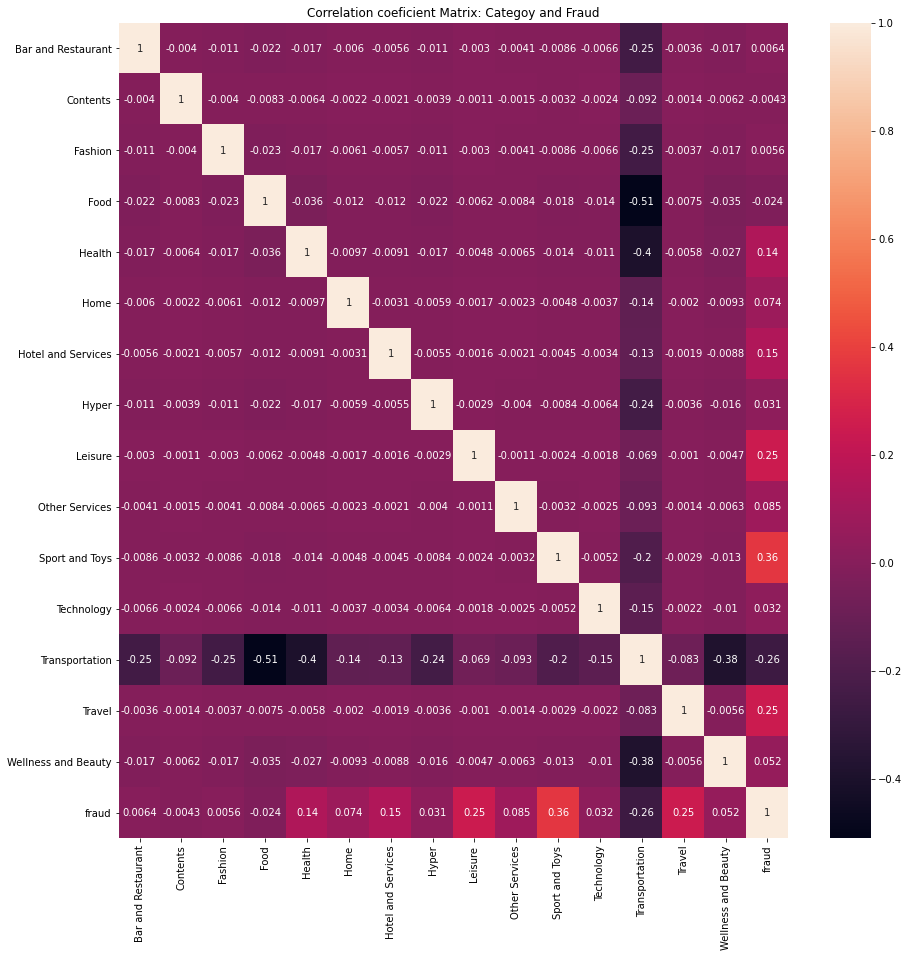

In [ ]:
fig = plt.figure(figsize=(15,15))
x = pd.concat([categoryD,bs.fraud], axis = 1)
corrMatrix = x.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation coeficient Matrix: Categoy and Fraud")
plt.show()

We are interested on the last line and we can see 


1.   Sector negatively correlated to Fraud
>> Transportation sector is negatively correlate to fraud (Coef = -.26)

2.   Sectors positively corelated to Fraud
>> Sport and Toys (.36)
>> Leisure (.25)
>> Travel (.25)





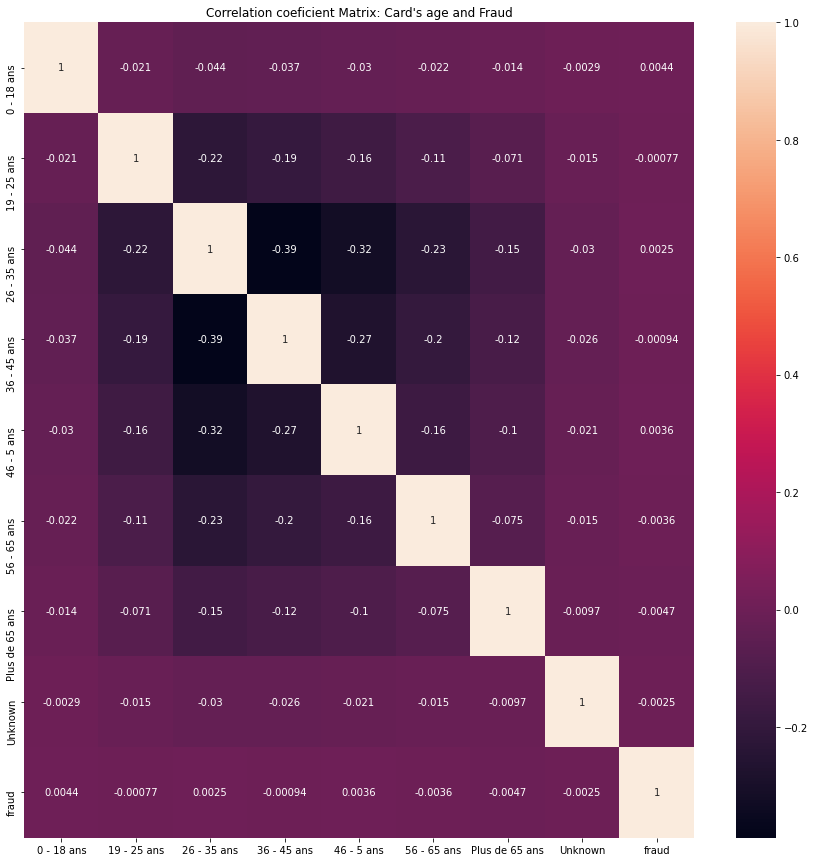

In [ ]:
fig = plt.figure(figsize=(15,15))
x = pd.concat([ageD,bs.fraud], axis = 1)
corrMatrix = x.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation coeficient Matrix: Card's age and Fraud")
plt.show()

In [ ]:
82

82

We are interested on the last line and we can see 
There are weak correlation between Fraud and the age of the card.

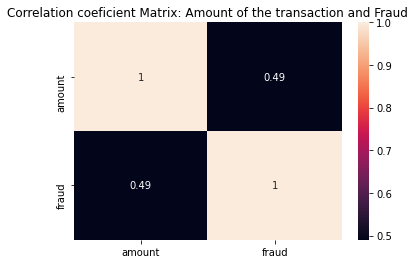

In [ ]:
corrMatrix2 = bs[["amount","fraud"]].corr()
sns.heatmap(corrMatrix2, annot=True)
plt.title("Correlation coeficient Matrix: Amount of the transaction and Fraud")
plt.show()

We found a positive correlation between the amount of a transaction and the fraud.